<div class="alert alert-info alert-info"><b><h1>EXERCICI 1</h1></b>
    
Agafa un text en anglès que vulguis, i calcula'n la freqüència de les paraules.
    
</div>

In [51]:
# Importamos las librerías necesarias
import pandas as pd
import numpy as np
import spacy
from spacy.language import Language
from spacy import displacy
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk.stem import SnowballStemmer
from nltk.sentiment import SentimentIntensityAnalyzer
from textblob import TextBlob
from collections import Counter
import matplotlib.pyplot as plt

<div class="alert alert-info alert-info">
    
He elegido para el ejercicio el discurso público que pronunció el activista estadounidense de derechos civiles y ministro bautista **Martin Luther King Jr.** durante la **Marcha en Washington por el trabajo y la libertad** el 28 de agosto de 1963. 
    
En el discurso, King llamó por los derechos civiles y económicos y el fin del racismo en los Estados Unidos. 
    
Pronunciado ante más de 250.000 defensores de los derechos civiles desde los escalones del Monumento a Lincoln en Washington, DC , el discurso fue uno de los momentos más famosos del movimiento por los derechos civiles y uno de los discursos más icónicos de la historia estadounidense .
    
</div>

In [2]:
Martin_L_King = """I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.
Five score years ago, a great American, in whose symbolic shadow we stand, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of captivity.
 America has given the Negro people a bad cheque which has come back marked 'insufficient funds'
But 100 years later, we must face the tragic fact that the Negro is still not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languishing in the corners of American society and finds himself an exile in his own land.
And so we've come here today to dramatize an appalling condition. In a sense we've come to our nation's capital to cash a cheque. When the architects of our republic wrote the magnificent words of the Constitution and the Declaration of Independence, they were signing a promissory note to which every American was to fall heir. This note was a promise that all men would be guaranteed the inalienable rights of "Life, Liberty, and the pursuit of Happiness."
It is obvious today that America has defaulted on this promissory note insofar as her citizens of colour are concerned. Instead of honouring this sacred obligation, America has given the Negro people a bad cheque which has come back marked "insufficient funds." But we refuse to believe that the bank of justice is bankrupt. We refuse to believe that there are insufficient funds in the great vaults of opportunity of this nation. So we've come to cash this cheque - a cheque that will give us upon demand the riches of freedom and the security of justice.
Sweltering summer... of discontent
We have also come to this hallowed spot to remind America of the fierce urgency of now. This is no time to engage in the luxury of cooling off or to take the tranquilizing drug of gradualism. Now is the time to rise from the dark and desolate valley of segregation to the sunlit path of racial justice. Now is the time to lift our nation from the quicksands of racial injustice to the solid rock of brotherhood. Now is the time to make justice a reality for all of God's children.
The whirlwinds of revolt will continue to shake the foundations of our nation until the bright day of justice emerges
It would be fatal for the nation to overlook the urgency of the moment. This sweltering summer of the Negro's legitimate discontent will not pass until there is an invigorating autumn of freedom and equality. 1963 is not an end, but a beginning. Those who hope that the Negro needed to blow off steam and will now be content will have a rude awakening if the nation returns to business as usual.
There will be neither rest nor tranquillity in America until the Negro is granted his citizenship rights. The whirlwinds of revolt will continue to shake the foundations of our nation until the bright day of justice emerges.
But there is something that I must say to my people, who stand on the warm threshold which leads into the palace of justice: in the process of gaining our rightful place we must not be guilty of wrongful deeds. Let us not seek to satisfy our thirst for freedom by drinking from the cup of bitterness and hatred. We must forever conduct our struggle on the high plane of dignity and discipline. We must not allow our creative protest to degenerate into physical violence. Again and again we must rise to the majestic heights of meeting physical force with soul force.
The marvellous new militancy which has engulfed the Negro community must not lead us to distrust of all white people, for many of our white brothers, as evidenced by their presence here today, have come to realize that their destiny is tied up with our destiny. They have come to realise that their freedom is inextricably bound to our freedom. We cannot walk alone. And as we walk, we must make the pledge that we shall march ahead. We cannot turn back.
Trials and tribulations
There are those who are asking the devotees of civil rights: "When will you be satisfied?" We can never be satisfied as long as the Negro is the victim of the unspeakable horrors of police brutality. We can never be satisfied as long as our bodies, heavy with the fatigue of travel, cannot gain lodging in the motels of the highways and the hotels of the cities. We cannot be satisfied as long as the Negro's basic mobility is from a smaller ghetto to a larger one. We can never be satisfied as long as our children are stripped of their selfhood and robbed of their dignity by signs stating "For Whites Only". We cannot be satisfied and we will not be satisfied as long as a Negro in Mississippi cannot vote and a Negro in New York believes he has nothing for which to vote. No, no, we are not satisfied, and we will not be satisfied until justice rolls down like waters and righteousness like a mighty stream.
I have a dream that one day on the red hills of Georgia the sons of former slaves and the sons of former slave-owners will be able to sit down together at a table of brotherhood
I am not unmindful that some of you have come here out of great trials and tribulations. Some of you have come fresh from narrow jail cells. Some of you have come from areas where your quest for freedom left you battered by the storms of persecution and staggered by the winds of police brutality. You have been the veterans of creative suffering. Continue to work with the faith that unearned suffering is redemptive.
Go back to Mississippi, go back to Alabama, go back to Georgia, go back to Louisiana, go back to the slums and ghettos of our northern cities, knowing that somehow this situation can and will be changed.
Let us not wallow in the valley of despair. I say to you today, my friends, that in spite of the difficulties and frustrations of the moment, I still have a dream. It is a dream deeply rooted in the American dream.
The dream
I have a dream that one day this nation will rise up and live out the true meaning of its creed - we hold these truths to be self-evident: that all men are created equal.
I have a dream that one day on the red hills of Georgia the sons of former slaves and the sons of former slave-owners will be able to sit down together at a table of brotherhood.
I have a dream that one day even the state of Mississippi, a desert state, sweltering with the heat of injustice and oppression, will be transformed into an oasis of freedom and justice.
I have a dream that my four little children will one day live in a nation where they will not be judged by the colour of their skin but by the content of their character.
I have a dream today!
I have a dream that one day, down in Alabama, with its vicious racists, with its governor having his lips dripping with the words of interposition and nullification; one day right there in Alabama little black boys and little black girls will be able to join hands with little white boys and white girls as sisters and brothers.
I have a dream today!
I have a dream that one day every valley shall be exalted, every hill and mountain shall be made low, the rough places will be made plain, and the crooked places will be made straight, and the glory of the Lord shall be revealed, and all flesh shall see it together.
This is our hope. This is the faith that I will go back to the South with. With this faith we will be able to hew out of the mountain of despair a stone of hope.
With this faith we will be able to transform the jangling discords of our nation into a beautiful symphony of brotherhood. With this faith we will be able to work together, to pray together, to struggle together, to go to jail together, to stand up for freedom together, knowing that we will be free one day.
This will be the day, this will be the day when all of God's children will be able to sing with a new meaning: "My country, 'tis of thee, sweet land of liberty, of thee I sing. Land where my fathers died, land of the pilgrim's pride, from every mountainside, let freedom ring." And if America is to be a great nation, this must become true.
And so let freedom ring from the prodigious hilltops of New Hampshire.
Let freedom ring from the mighty mountains of New York.
Let freedom ring from the heightening Alleghenies of Pennsylvania!
Let freedom ring from the snow-capped Rockies of Colorado.
Let freedom ring from the curvaceous peaks of California.
But not only that.
Let freedom ring from Stone Mountain of Georgia.
Let freedom ring from Lookout Mountain of Tennessee.
Let freedom ring from every hill and every molehill of Mississippi, from every mountainside, let freedom ring!
And when this happens, when we allow freedom to ring, when we let it ring from every village and every hamlet, from every state and every city, we will be able to speed up that day when all of God's children, black men and white men, Jews and Gentiles, Protestants and Catholics, will be able to join hands and sing in the words of the old Negro spiritual: "Free at last! Free at last! thank God Almighty, we are free at last!"""

In [3]:
print(Martin_L_King)

I am happy to join with you today in what will go down in history as the greatest demonstration for freedom in the history of our nation.
Five score years ago, a great American, in whose symbolic shadow we stand, signed the Emancipation Proclamation. This momentous decree came as a great beacon light of hope to millions of Negro slaves who had been seared in the flames of withering injustice. It came as a joyous daybreak to end the long night of captivity.
 America has given the Negro people a bad cheque which has come back marked 'insufficient funds'
But 100 years later, we must face the tragic fact that the Negro is still not free. One hundred years later, the life of the Negro is still sadly crippled by the manacles of segregation and the chains of discrimination. One hundred years later, the Negro lives on a lonely island of poverty in the midst of a vast ocean of material prosperity. One hundred years later, the Negro is still languishing in the corners of American society and fin

<div class="alert alert-info alert-info">
    
Realizamos el preprocesado del texto mediante la tokenización del mismo.  Para este ejercicio utilizaremos las funciones de la librería **spaCy**
    
</div>

In [4]:
# Cargamos el modelo pequeño del idioma inglés en spaCy
nlp = spacy.load('en_core_web_sm')

In [5]:
# tokenizamos todo el texto
doc = nlp(Martin_L_King)

In [6]:
# Obtener los textos de los tokens en minúsculas en forma de lista
tokens_lower = [token.text.lower() for token in doc]
print(tokens_lower)

['i', 'am', 'happy', 'to', 'join', 'with', 'you', 'today', 'in', 'what', 'will', 'go', 'down', 'in', 'history', 'as', 'the', 'greatest', 'demonstration', 'for', 'freedom', 'in', 'the', 'history', 'of', 'our', 'nation', '.', '\n', 'five', 'score', 'years', 'ago', ',', 'a', 'great', 'american', ',', 'in', 'whose', 'symbolic', 'shadow', 'we', 'stand', ',', 'signed', 'the', 'emancipation', 'proclamation', '.', 'this', 'momentous', 'decree', 'came', 'as', 'a', 'great', 'beacon', 'light', 'of', 'hope', 'to', 'millions', 'of', 'negro', 'slaves', 'who', 'had', 'been', 'seared', 'in', 'the', 'flames', 'of', 'withering', 'injustice', '.', 'it', 'came', 'as', 'a', 'joyous', 'daybreak', 'to', 'end', 'the', 'long', 'night', 'of', 'captivity', '.', '\n ', 'america', 'has', 'given', 'the', 'negro', 'people', 'a', 'bad', 'cheque', 'which', 'has', 'come', 'back', 'marked', "'", 'insufficient', 'funds', "'", '\n', 'but', '100', 'years', 'later', ',', 'we', 'must', 'face', 'the', 'tragic', 'fact', 'that'

In [7]:
# Calcular la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_lower)

# Obtener las 20 palabras de mayor frecuencia
top_palabras = frecuencia_palabras.most_common(20)

for palabra, frecuencia in top_palabras:
    print(palabra, frecuencia)

the 109
of 106
. 74
, 65
to 60
and 48

 39
a 39
be 35
we 34
will 31
that 27
in 23
is 22
freedom 20
this 20
not 20
as 18
our 18
have 18


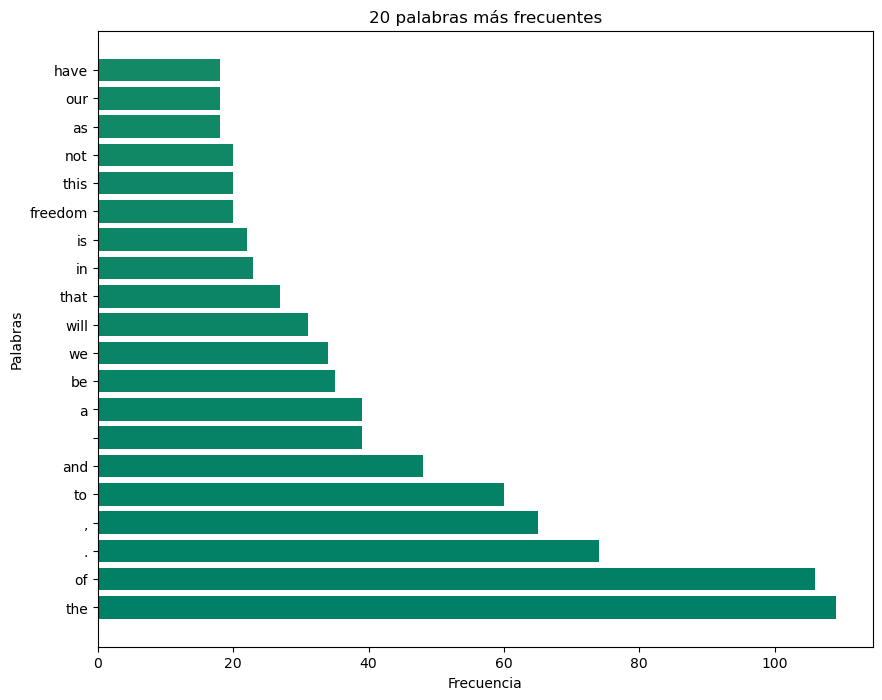

In [8]:
# Vemos en un gráfico las 20 palabras más frecuentes en el discurso de Martin_L_King
palabras = [palabra[0] for palabra in top_palabras]
cuenta = [cuenta[1] for cuenta in top_palabras]
color_map = plt.get_cmap('summer')
plt.figure(figsize=(10, 8))
plt.barh(palabras, cuenta, color=color_map(np.arange(len(palabras))))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más frecuentes')
plt.show()

<div class="alert alert-info alert-info">
    
En el resultado podemos ver que la mayor frecuencia la ocupan palabras funcionales o vacías que tienen funciones gramaticales pero no tienen un significado léxico o sustantivo en sí mismas.

Es por ello que volveremos a tokenizar de nuevo el texto pero excluyendo los "stopwords", los signos de puntación y los espacios en blanco.
    
</div>

In [9]:
# Obtener los textos de los tokens en minúsculas en forma de lista excluyendo las palabras funcionales y los saltos de línea
tokens_lower = [token.text.lower() for token in doc if not token.is_stop and not token.is_punct and not token.is_space]
print(tokens_lower)

['happy', 'join', 'today', 'history', 'greatest', 'demonstration', 'freedom', 'history', 'nation', 'score', 'years', 'ago', 'great', 'american', 'symbolic', 'shadow', 'stand', 'signed', 'emancipation', 'proclamation', 'momentous', 'decree', 'came', 'great', 'beacon', 'light', 'hope', 'millions', 'negro', 'slaves', 'seared', 'flames', 'withering', 'injustice', 'came', 'joyous', 'daybreak', 'end', 'long', 'night', 'captivity', 'america', 'given', 'negro', 'people', 'bad', 'cheque', 'come', 'marked', 'insufficient', 'funds', '100', 'years', 'later', 'face', 'tragic', 'fact', 'negro', 'free', 'years', 'later', 'life', 'negro', 'sadly', 'crippled', 'manacles', 'segregation', 'chains', 'discrimination', 'years', 'later', 'negro', 'lives', 'lonely', 'island', 'poverty', 'midst', 'vast', 'ocean', 'material', 'prosperity', 'years', 'later', 'negro', 'languishing', 'corners', 'american', 'society', 'finds', 'exile', 'land', 'come', 'today', 'dramatize', 'appalling', 'condition', 'sense', 'come',

In [10]:
# Volvemos a calcular la frecuencia de las palabras
frecuencia_palabras = Counter(tokens_lower)

# Obtenemos de nuevo las 20 palabras de mayor frecuencia
top_palabras = frecuencia_palabras.most_common(20)

for palabra, frecuencia in top_palabras:
    print(palabra, frecuencia)

freedom 20
negro 16
day 14
let 13
dream 13
nation 12
ring 12
come 11
justice 9
satisfied 9
able 9
today 7
long 6
america 6
years 5
great 5
cheque 5
free 5
children 5
new 5


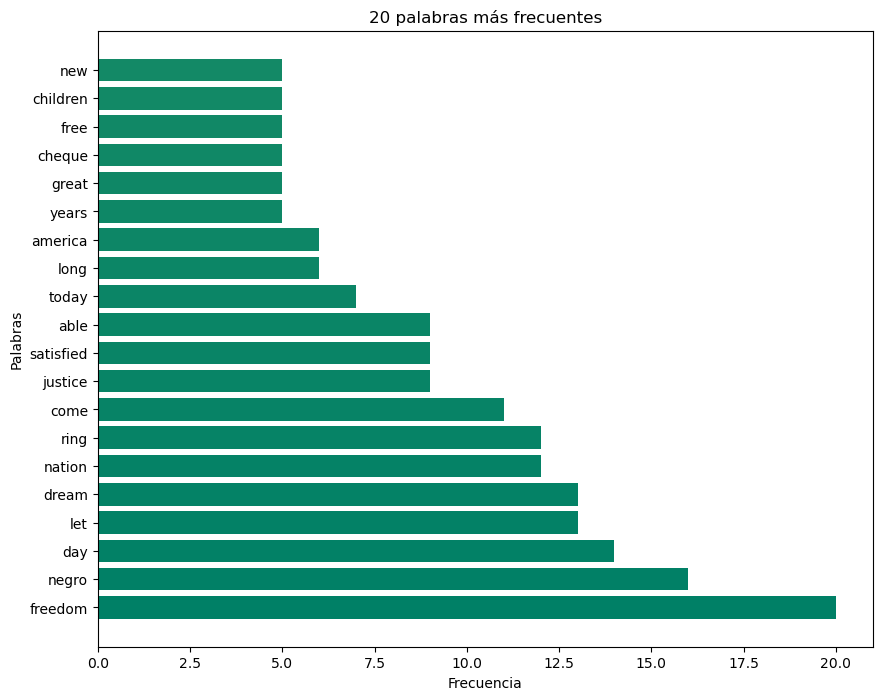

In [11]:
# Vemos en un gráfico las 20 palabras más frecuentes en el discurso de Martin_L_King
palabras = [palabra[0] for palabra in top_palabras]
cuenta = [cuenta[1] for cuenta in top_palabras]
color_map = plt.get_cmap('summer')
plt.figure(figsize=(10, 8))
plt.barh(palabras, cuenta, color=color_map(np.arange(len(palabras))))
plt.xlabel('Frecuencia')
plt.ylabel('Palabras')
plt.title('20 palabras más frecuentes')
plt.show()

<div class="alert alert-info alert-info">
    
Ahora si queda más claro que la palabra más frecuente refleja el espíritu del discurso de Martin L. King.
    
Resaltar la curiosidad que martin utiliza la palabra "negro" como la segunda más frecuente y en este caso la traducción al español afirma que las sentencias "the Negro" y "Negro slaves" que aparecen en el discurso se pueden traducir como 
personas negras o esclavos negros.
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 2</h1></b>
    
Treu les stopwords i realitza stemming al teu conjunt de dades.
    
</div>

<div class="alert alert-info alert-info">
    
Mediante la librería spaCy ya hemos realizado el stopwords (con la función **token.is_stop**) y también la _lemmatización_ ya que es una función que se carga por defecto al instanciar un nuevo modelo : ['tok2vec', 'tagger', 'parser', 'attribute_ruler', **'lemmatizer'**, 'ner'].
    
Es por ello que para el ejercicio2 utilizaremos la librería nltk empezando con el texto desde el principio. Realizaremos un pipeline personalizado para aplicar al texto de entrada
    
</div>

In [37]:
# Aplicamos el stopwords y las eliminamos del texto original
def rem_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    filtered_tokens = [token for token in tokens if token not in stop_words]
    return filtered_tokens

In [38]:
# Aplicamos el stemming
def per_stemming(tokens):
    stemmer = SnowballStemmer('english')
    stemmed_tokens = [stemmer.stem(token) for token in tokens]
    return stemmed_tokens

In [45]:
# Creamos el pipeline personalizado incluyendo la tokenización previa del texto
def prepro_text(text):
    tokens = word_tokenize(text)# Tokenizamos el texto
    tokens = [token.lower() for token in tokens if token.isalpha()] # Nos quedamos solo con los carácteres alfanuméricos en minuscula
    tokens = remove_stopwords(tokens)
    tokens = perform_stemming(tokens)
    return tokens

In [46]:
# Llamamos al pipeline creado y le pasamos nuestro texto original
processed_text = preprocess_text(Martin_L_King)
print(processed_text)

['happi', 'join', 'today', 'go', 'histori', 'greatest', 'demonstr', 'freedom', 'histori', 'nation', 'five', 'score', 'year', 'ago', 'great', 'american', 'whose', 'symbol', 'shadow', 'stand', 'sign', 'emancip', 'proclam', 'moment', 'decre', 'came', 'great', 'beacon', 'light', 'hope', 'million', 'negro', 'slave', 'sear', 'flame', 'wither', 'injustic', 'came', 'joyous', 'daybreak', 'end', 'long', 'night', 'captiv', 'america', 'given', 'negro', 'peopl', 'bad', 'chequ', 'come', 'back', 'mark', 'year', 'later', 'must', 'face', 'tragic', 'fact', 'negro', 'still', 'free', 'one', 'hundr', 'year', 'later', 'life', 'negro', 'still', 'sad', 'crippl', 'manacl', 'segreg', 'chain', 'discrimin', 'one', 'hundr', 'year', 'later', 'negro', 'live', 'lone', 'island', 'poverti', 'midst', 'vast', 'ocean', 'materi', 'prosper', 'one', 'hundr', 'year', 'later', 'negro', 'still', 'languish', 'corner', 'american', 'societi', 'find', 'exil', 'land', 'come', 'today', 'dramat', 'appal', 'condit', 'sens', 'come', 'na

<div class="alert alert-info alert-info">
    
Realizamos una compartiva de las 10 palabras más frecuentes antes y despúes de aplicar nuestro pipeline
    
</div>

In [41]:
# Guardamos los datos del antes
all_tokens = word_tokenize(Martin_L_King)
freq_before = nltk.FreqDist(all_tokens)

In [42]:
# Tenemos los datos del después
freq_after = nltk.FreqDist(processed_text)

In [43]:
# Obtención de las palabras y frecuencias antes y después
top_words_before = freq_before.most_common(10)
words_before, counts_before = zip(*top_words_before)
top_words_after = freq_after.most_common(10)
words_after, counts_after = zip(*top_words_after)

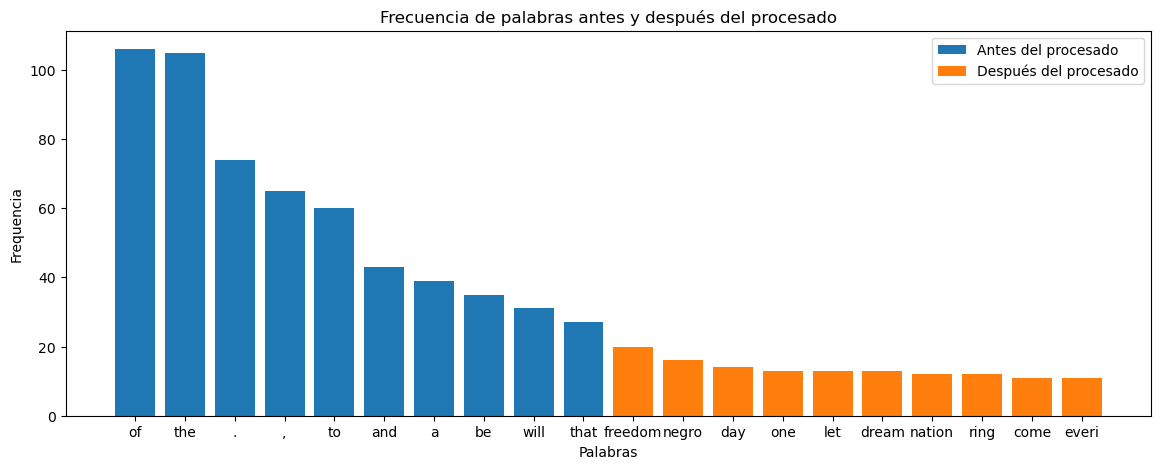

In [47]:
# Creación del gráfico de barras para ver la diferencia
plt.figure(figsize=(14, 5))
plt.bar(words_before, counts_before, label='Antes del procesado')
plt.bar(words_after, counts_after, label='Después del procesado')
plt.xlabel('Palabras')
plt.ylabel('Frequencia')
plt.title('Frecuencia de palabras antes y después del procesado')
plt.legend()
plt.show()

<div class="alert alert-info alert-info">
    
Vemos que el resultado obtenido es similar al del ejercicio anterior con **spaCy** y las palabras más frecuentes tras el procesado son **freedom* y **negro**
    
</div>

<div class="alert alert-info alert-info"><b><h1>EXERCICI 3</h1></b>
    
Realitza sentiment analysis al teu conjunt de dades.
    
</div>

In [49]:
# creamos una instancia de la clase SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()
sentimKing = sia.polarity_scores(Martin_L_King)
print("El discurso de martin L. King presenta estas características:",sentimKing)

El discurso de martin L. King presenta estas características: {'neg': 0.102, 'neu': 0.708, 'pos': 0.19, 'compound': 0.9996}


<div class="alert alert-info alert-info">
    
El discurso de Martin Luther King Jr., según las características proporcionadas, muestra una distribución de sentimientos en el siguiente formato:

**Negativo (neg): 0.102**
**Neutro (neu): 0.708**
**Positivo (pos): 0.19**
**Compuesto (compound): 0.9996**
    
Estos puntajes sugieren que el discurso tiene una presencia significativa de sentimientos neutros (neu: 0.708), seguidos de un componente positivo (pos: 0.19). La puntuación compuesta (compound: 0.9996) es extremadamente alta y cercana a 1, lo que indica un sentimiento generalmente muy positivo en el discurso de Martin Luther King Jr.

Es importante tener en cuenta que estos puntajes se generan utilizando el análisis de sentimiento proporcionado por SentimentIntensityAnalyzer de NLTK. Sin embargo, los puntajes por sí solos no proporcionan el contexto completo del discurso y su interpretación depende de una comprensión más profunda del contenido y el contexto del discurso en sí.
    
</div>

In [52]:
# Aplicamos también TextBlob para realizar análisis de sentimientos
blob = TextBlob(Martin_L_King)

# Calcular la polaridad del sentimiento
polarity = blob.sentiment.polarity

# Calcular la subjetividad del sentimiento
subjectivity = blob.sentiment.subjectivity

# Imprimir los resultados
print(f"Polaridad: {polarity}")
print(f"Subjetividad: {subjectivity}")

Polaridad: 0.12588376270194454
Subjetividad: 0.4654014672196487


<div class="alert alert-info alert-info">
    
En este caso, la polaridad del sentimiento es de aproximadamente 0.126, lo que indica que el texto tiene una leve inclinación hacia un sentimiento positivo, pero aún se considera cercano al punto neutral.

La subjetividad del sentimiento es de aproximadamente 0.465, lo que sugiere que el texto tiene cierto grado de subjetividad y está basado en opiniones personales.
    
</div>